<a href="https://colab.research.google.com/github/hktimmana/first-cat/blob/master/Resnet_40X_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import json
import math
import os
import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import ResNet50
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools

Using TensorFlow backend.


In [4]:
from keras.applications import ResNet50
from keras import optimizers
import tensorflow as tf
from keras import backend as K
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(tf.distribute.cluster_resolver.TPUClusterResolver())

#input_shape = (150, 150, 3)
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    return model
with strategy.scope():
  resnet = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
  model = build_model(resnet ,lr = 1e-4)
  model.summary()

INFO:tensorflow:Initializing the TPU system: grpc://10.100.25.90:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.100.25.90:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 16392     
Total params: 23,612,296
Trainable params: 23,555,080
Non-trainable params: 57,216
_________________________________________________________________


In [25]:
import glob
from sklearn import preprocessing
class_list=['A', 'DC', 'F', 'LC', 'MC', 'PC', 'PT', 'TA']
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    LBL = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in glob.glob(DIR):
      img = read(IMAGE_NAME)
      img = cv2.resize(img, (RESIZE,RESIZE))
      IMG.append(np.array(img))
      LBL.append(class_list.index(IMAGE_NAME.split('/')[-2].strip()))
    return np.array(IMG),np.array(LBL)
train_path='/content/gdrive/My Drive/research/final/40X/train/**/*.png'
validation_path='/content/gdrive/My Drive/research/final/40X/val/**/*.png'
test_path='/content/gdrive/My Drive/research/final/40X/test/**/*.png'
model_path='/content/gdrive/My Drive/research/model/'
x_train,y_train = Dataset_loader(train_path,224)
x_test,y_test = Dataset_loader(test_path,224)
x_valid,y_valid = Dataset_loader(validation_path,224)
print(x_train.shape)

(1393, 224, 224, 3)


In [27]:
num_classes=8
s = np.arange(x_train.shape[0])
np.random.shuffle(s)
X_train = x_train[s]
Y_train = y_train[s]

s = np.arange(x_valid.shape[0])
np.random.shuffle(s)
X_val = x_valid[s]
Y_val = y_valid[s]

s = np.arange(x_test.shape[0])
np.random.shuffle(s)
X_test = x_test[s]
Y_test = y_test[s]

Y_train = to_categorical(Y_train, num_classes)
Y_val = to_categorical(Y_val, num_classes)
Y_test = to_categorical(Y_test, num_classes)

In [28]:
BATCH_SIZE = 16

train_generator = ImageDataGenerator(
        zoom_range=2,  # set range for random zoom
        rotation_range = 90,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
    )

In [ ]:
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,verbose=1,factor=0.2, min_lr=1e-7)

filepath="/content/gdrive/My Drive/research/model/Resnet_40X_MC_weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model.fit_generator(
    train_generator.flow(X_train, Y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=30,
    validation_data=(X_val, Y_val),
    callbacks=[learn_control, checkpoint]
)

EXaperiment2: https://www.kaggle.com/praanj/transfer-learning-vgg-19-resnet-50-with-kfold/data

In [32]:
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.preprocessing.image import  ImageDataGenerator, img_to_array, image, load_img
from keras import backend as K
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from keras.models import load_model
from keras.models import Model
import keras

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16

#Variable defining
SAMPLE_PER_CATEGORY = 200
SEED = 42
WIDTH = 128
HEIGHT = 128
DEPTH = 3
INPUT_SHAPE = (WIDTH, HEIGHT, DEPTH)

data_dir = '/content/gdrive/My Drive/research/final/40X/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
val_dir = os.path.join(data_dir, 'val')
#sample_submission = pd.read_csv(os.path.join(data_dir, 'sample_submission.csv'))

In [33]:
CATEGORIES = ['A', 'DC', 'F', 'LC', 'MC', 'PC', 'PT', 'TA']
NUM_CATEGORIES = len(CATEGORIES)
for category in CATEGORIES:
    print('{} {} images'.format(category, len(os.listdir(os.path.join(train_dir, category)))))

A 79 images
DC 604 images
F 177 images
LC 109 images
MC 143 images
PC 101 images
PT 76 images
TA 104 images


In [35]:
def read_img(filepath, size):
    img = image.load_img(os.path.join(data_dir, filepath), target_size=size) 
    img = image.img_to_array(img)
    return img


In [36]:
train = []
for category_id, category in enumerate(CATEGORIES):
    for file in os.listdir(os.path.join(train_dir, category)):
        train.append(['train/{}/{}'.format(category, file), category_id, category])
train = pd.DataFrame(train, columns=['file', 'category_id', 'category'])
train.shape

(1393, 3)

In [37]:
train.head(2)

,file,category_id,category
0,train/A/SOB_B_A-14-22549AB-40-022.png,0,A
1,train/A/SOB_B_A-14-22549AB-40-024.png,0,A


In [38]:
train = pd.concat([train[train['category'] == c][:SAMPLE_PER_CATEGORY] for c in CATEGORIES])
train = train.sample(frac=1)
train.index = np.arange(len(train))
train.shape

(989, 3)

In [59]:
train

,file,category_id,category
0,train/LC/SOB_M_LC-14-15570-40-035.png,3,LC
1,train/TA/SOB_B_TA-14-16184CD-40-026.png,7,TA
2,train/A/SOB_B_A-14-22549G-40-029.png,0,A
3,train/LC/SOB_M_LC-14-15570C-40-011.png,3,LC
4,train/LC/SOB_M_LC-14-15570C-40-010.png,3,LC
...,...,...,...
984,train/PC/SOB_M_PC-14-12465-40-005.png,5,PC
985,train/TA/SOB_B_TA-14-3411F-40-012.png,7,TA
986,train/TA/SOB_B_TA-14-16184CD-40-028.png,7,TA
987,train/MC/SOB_M_MC-14-13413-40-001.png,4,MC


In [40]:
test = []
for file in os.listdir(test_dir):
    test.append(['test/{}'.format(file), file])
test = pd.DataFrame(test, columns=['filepath', 'file'])
test.shape

(8, 2)

In [41]:
test.head(2)

,filepath,file
0,test/A,A
1,test/DC,DC


In [60]:
val = []
for category_id, category in enumerate(CATEGORIES):
    for file in os.listdir(os.path.join(val_dir, category)):
        val.append(['val/{}/{}'.format(category, file), category_id, category])
val = pd.DataFrame(val, columns=['file', 'category_id', 'category'])
val.shape

(395, 3)

In [61]:
val.head(2)

,file,category_id,category
0,val/A/SOB_B_A-14-22549AB-40-012.png,0,A
1,val/A/SOB_B_A-14-22549AB-40-021.png,0,A


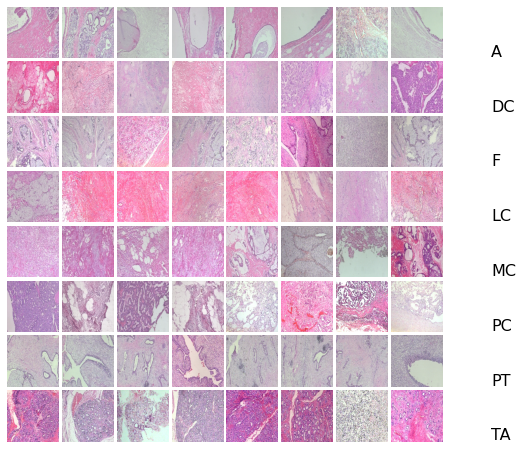

In [44]:
fig = plt.figure(1, figsize=(NUM_CATEGORIES, NUM_CATEGORIES))
grid = ImageGrid(fig, 111, nrows_ncols=(NUM_CATEGORIES, NUM_CATEGORIES), axes_pad=0.05)
i = 0
for category_id, category in enumerate(CATEGORIES):
    for filepath in train[train['category'] == category]['file'].values[:NUM_CATEGORIES]:
        ax = grid[i]
        img = read_img(filepath, (WIDTH, HEIGHT))
        ax.imshow(img / 255.)
        ax.axis('off')
        if i % NUM_CATEGORIES == NUM_CATEGORIES - 1:
            ax.text(250, 112, filepath.split('/')[1], verticalalignment='center')
        i += 1
plt.show();

In [45]:
np.random.seed(seed=SEED)

VGG-19 model layers identification

In [46]:
def setTrainableLayersVGG(vgg_model):
    set_trainable = False
    for layer in vgg_model.layers:
        if layer.name in ['block5_conv1', 'block4_conv1']:
            set_trainable = True
            
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False
    return vgg_model

In [47]:
vgg = VGG19(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model = setTrainableLayersVGG(vgg_model)
# vgg_model.trainable = False
# for layer in vgg_model.layers:
#     layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])  

80142336/80134624 [==============================] - 1s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if sys.path[0] == '':


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7feaeadd1518>,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0x7feaeaddab00>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7feaeae349b0>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7feaead922b0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7feaead92710>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7feaea8f3358>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7feaead6ea20>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7feaead6eeb8>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7feaea9016a0>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7feaead6b4e0>,block3_conv3,False


ResNet-50 model identification

In [48]:
def setTrainableLayersResNet(resnet_model):
    set_trainable = False
    for layer in resnet_model.layers:
        if layer.name in ['res5c_branch2b', 'res5c_branch2c', 'activation_97']:
            set_trainable = True
            
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False
    return resnet_model

In [49]:
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)

output = resnet.layers[-1].output
output = keras.layers.Flatten()(output)
resnet_model = Model(resnet.input, output)

setTrainableLayersResNet(resnet_model)
# resnet_model.trainable = False
# for layer in resnet_model.layers:
#     layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in resnet_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if sys.path[0] == '':


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7feaea890898>,input_3,False
1,<keras.layers.convolutional.ZeroPadding2D object at 0x7feaea890978>,conv1_pad,False
2,<keras.layers.convolutional.Conv2D object at 0x7feaea890ac8>,conv1,False
3,<keras.layers.normalization.BatchNormalization object at 0x7feaea890b38>,bn_conv1,False
4,<keras.layers.core.Activation object at 0x7feaea890cc0>,activation_50,False
...,...,...,...
171,<keras.layers.convolutional.Conv2D object at 0x7feae9ec1d30>,res5c_branch2c,True
172,<keras.layers.normalization.BatchNormalization object at 0x7feae9ec64e0>,bn5c_branch2c,True
173,<keras.layers.merge.Add object at 0x7feae9e5ad30>,add_32,True
174,<keras.layers.core.Activation object at 0x7feae9e765c0>,activation_98,True


Print function for training history

In [50]:
def printHistory(history, title, epochs):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle(title, fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    epoch_list = list(range(1,epochs+1))
    ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, epochs+1, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, epochs+1, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

In [64]:
def createModel(pretrainedModel, fineTune, number_of_hidden_layers, activation, optimizer, learning_rate, epochs):
    print("Create Model")

    tranfer_model = 0 # just define
    
    if pretrainedModel == "ResNet-50":
        tranfer_model = ResNet50(weights='imagenet', input_shape=INPUT_SHAPE, include_top=False)
        if fineTune == True:
            tranfer_model = setTrainableLayersResNet(tranfer_model)
        else:
            for layer in tranfer_model.layers:
                tranfer_model.trainable = False  # freeze feature extracting layers
    elif pretrainedModel == "VGG-19":
        tranfer_model = VGG19(weights='imagenet', input_shape=INPUT_SHAPE, include_top=False)
        
        if fineTune == True:
            tranfer_model = setTrainableLayersVGG(tranfer_model)
        else:
            for layer in tranfer_model.layers:
                layer.trainable = False  # freeze feature extracting layers

    output = tranfer_model.layers[-1].output
    output = keras.layers.Flatten()(output)
    trans_model = Model(tranfer_model.input, output)

    model = Sequential()
    model.add(trans_model)
    
    for i in range(0,number_of_hidden_layers):
        model.add(Dense(512))
        model.add(Activation(activation))
        model.add(Dropout(0.3))

    model.add(Dense(NUM_CATEGORIES, activation='softmax'))

    if optimizer == 'SGD':
        opt = SGD(lr=learning_rate, decay=learning_rate / epochs)
    elif optimizer == 'Adam':
        opt = Adam(lr=learning_rate, decay=learning_rate / epochs)

    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model


In [65]:
#callbacks for keras modal
def get_callbacks(patience,filepath):
    print("Get Callbacks")

    lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=1e-5, patience=patience, verbose=1)
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [lr_reduce,msave, EarlyStopping()]

In [66]:
def trainModelDF(images, pretrainedModel, fineTune, epochs, batch_size, learning_rate, cross_validation_folds, activation, number_of_hidden_layers, optimizer):
    print("Train Model")
     
    datagen_train = ImageDataGenerator(rescale=1./255)
    
    datagen_valid = ImageDataGenerator(rescale=1./255)
        
    print("Cross validation")
    kfold = StratifiedKFold(n_splits=cross_validation_folds, shuffle=True)
    cvscores = []
    iteration = 1
    
    t = images.category_id
    
    for train_index, test_index in kfold.split(np.zeros(len(t)), t):

        print("======================================")
        print("Iteration = ", iteration)

        iteration = iteration + 1

        train = images.loc[train_index]
        test = images.loc[test_index]

        print("======================================")
        
        model = createModel(pretrainedModel, fineTune, number_of_hidden_layers, activation, optimizer, learning_rate, epochs)

        print("======================================")
        
        train_generator = datagen_train.flow_from_dataframe(dataframe=train,
                                                  directory=data_dir,
                                                  x_col="file",
                                                  y_col="category",
                                                  batch_size=batch_size,
                                                  seed=SEED,
                                                  shuffle=True,
                                                  class_mode="categorical",
                                                  target_size=(HEIGHT, WIDTH));
        valid_generator=datagen_valid.flow_from_dataframe(dataframe=val,
                                                  directory=data_dir,
                                                  x_col="file",
                                                  y_col="category",
                                                  batch_size=batch_size,
                                                  seed=SEED,
                                                  shuffle=False,
                                                  class_mode="categorical",
                                                  target_size=(HEIGHT, WIDTH));
        
        STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
        STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

        #Trains the model on data generated batch-by-batch by a Python generator
        history = model.fit_generator(generator=train_generator,\
                            validation_data = valid_generator, \
                            steps_per_epoch=STEP_SIZE_TRAIN, \
                            validation_steps=STEP_SIZE_VALID, \
                            epochs=epochs, \
                            verbose=1)#, \
#                             callbacks = get_callbacks(patience=2))
        
        scores = model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID, pickle_safe=True)
        print("Accuarcy %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)
        
        printHistory(history, pretrainedModel, epochs)

    accuracy = np.mean(cvscores);
    std = np.std(cvscores);
    print("Accuracy: %.2f%% (+/- %.2f%%)" % (accuracy, std))
    return accuracy, std

VGG-19 as a feature extractor

Train Model
Cross validation
Iteration =  1
Create Model
Found 791 validated image filenames belonging to 8 classes.
Found 395 validated image filenames belonging to 8 classes.
Epoch 1/24
24/24 [==============================] - 19s 784ms/step - loss: 2.3489 - accuracy: 0.1660 - val_loss: 2.1307 - val_accuracy: 0.2318
Epoch 2/24
24/24 [==============================] - 19s 808ms/step - loss: 1.9235 - accuracy: 0.2912 - val_loss: 1.9757 - val_accuracy: 0.4242
Epoch 3/24
24/24 [==============================] - 19s 788ms/step - loss: 1.8463 - accuracy: 0.3203 - val_loss: 1.8839 - val_accuracy: 0.4518
Epoch 4/24
24/24 [==============================] - 19s 775ms/step - loss: 1.7229 - accuracy: 0.3507 - val_loss: 2.2361 - val_accuracy: 0.4132
Epoch 5/24
24/24 [==============================] - 18s 761ms/step - loss: 1.6385 - accuracy: 0.3847 - val_loss: 1.2813 - val_accuracy: 0.5014
Epoch 6/24
24/24 [==============================] - 18s 748ms/step - loss: 1.4958 - accuracy: 0.4102 - val_l

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `evaluate_generator` call to the Keras 2 API: `evaluate_generator(generator=<keras.pre..., steps=12, use_multiprocessing=True)`


Accuarcy accuracy: 40.62%
Iteration =  2
Create Model
Found 791 validated image filenames belonging to 8 classes.
Found 395 validated image filenames belonging to 8 classes.
Epoch 1/24
24/24 [==============================] - 18s 764ms/step - loss: 2.2844 - accuracy: 0.1871 - val_loss: 1.9587 - val_accuracy: 0.1745
Epoch 2/24
24/24 [==============================] - 19s 801ms/step - loss: 1.8895 - accuracy: 0.2701 - val_loss: 1.6580 - val_accuracy: 0.4435
Epoch 3/24
24/24 [==============================] - 19s 792ms/step - loss: 1.8136 - accuracy: 0.2938 - val_loss: 1.5243 - val_accuracy: 0.4986
Epoch 4/24
24/24 [==============================] - 19s 771ms/step - loss: 1.6801 - accuracy: 0.3516 - val_loss: 1.9206 - val_accuracy: 0.3526
Epoch 5/24
24/24 [==============================] - 18s 765ms/step - loss: 1.6141 - accuracy: 0.3900 - val_loss: 1.3887 - val_accuracy: 0.5179
Epoch 6/24
24/24 [==============================] - 18s 770ms/step - loss: 1.5107 - accuracy: 0.4242 - val_loss

(45.364583134651184, 3.609942331194897)

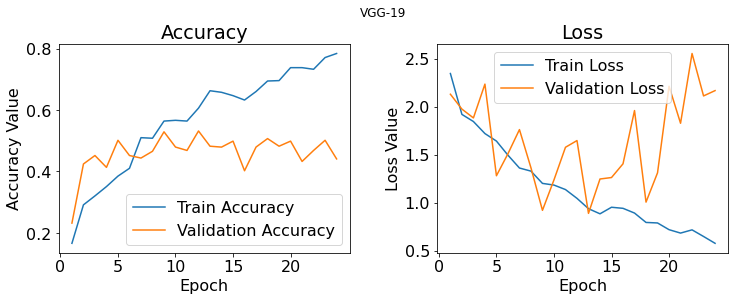

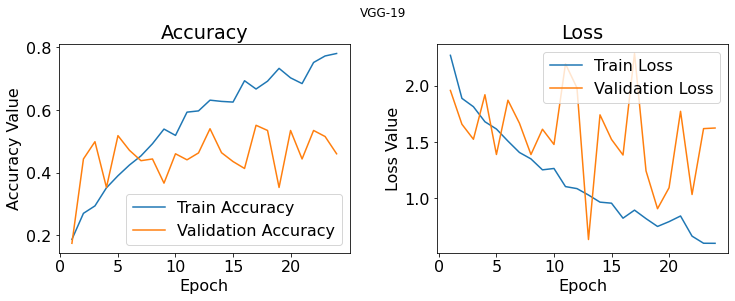

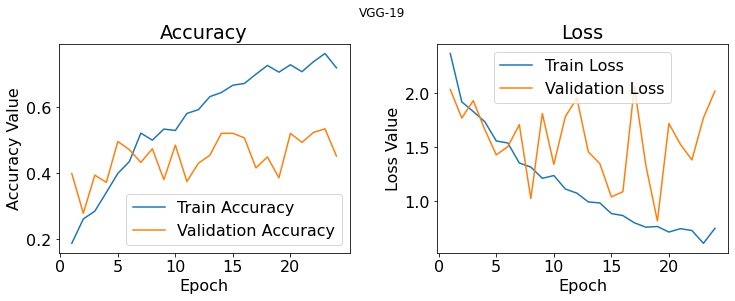

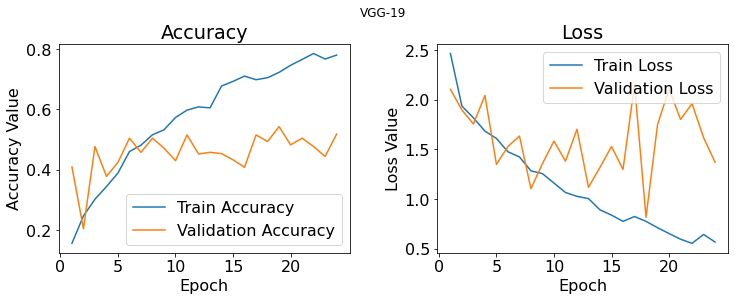

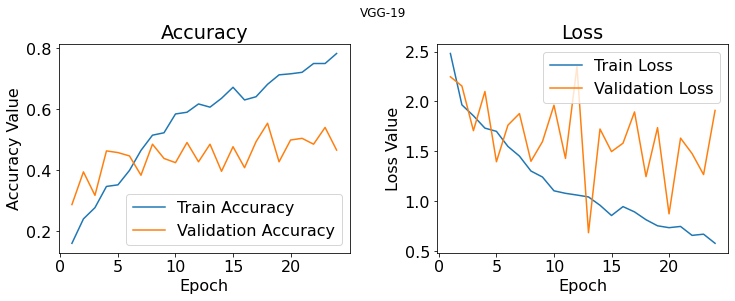

In [67]:
trainModelDF(
    train,
    pretrainedModel = "VGG-19", #ResNet-50
    fineTune = False,
    batch_size =32,
    cross_validation_folds = 5,
    learning_rate = 0.001,
    activation = 'relu',
    number_of_hidden_layers = 2,
    optimizer = 'Adam',
    epochs = 24
)

ResNet-50 as a feature extractor

In [ ]:
trainModelDF(
    train,
    pretrainedModel = "ResNet-50", #ResNet-50
    fineTune = False,
    batch_size =4,
    cross_validation_folds = 5,
    learning_rate = 0.001,
    activation = 'relu',
    number_of_hidden_layers = 1,
    optimizer = 'Adam',
    epochs = 64
)

Train Model
Cross validation
Iteration =  1
Create Model


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Found 791 validated image filenames belonging to 8 classes.
Found 395 validated image filenames belonging to 8 classes.
Epoch 1/64
197/197 [==============================] - 73s 369ms/step - loss: 3.6539 - accuracy: 0.2058 - val_loss: 3.1458 - val_accuracy: 0.0740
Epoch 2/64
197/197 [==============================] - 62s 316ms/step - loss: 2.0804 - accuracy: 0.2135 - val_loss: 2.7420 - val_accuracy: 0.4271
Epoch 3/64
197/197 [==============================] - 62s 314ms/step - loss: 2.0388 - accuracy: 0.2414 - val_loss: 3.7238 - val_accuracy: 0.0793
Epoch 4/64
197/197 [==============================] - 62s 314ms/step - loss: 2.1066 - accuracy: 0.2262 - val_loss: 2.0422 - val_accuracy: 0.3632
Epoch 5/64
197/197 [==============================] - 62s 315ms/step - loss: 2.1096 - accuracy: 0.2160 - val_loss: 8.3911 - val_accuracy: 0.0946
Epoch 6/64
197/197 [==============================] - 62s 314ms/step - loss: 2.0634 - accuracy: 0.2058 - val_loss: 2.8384 - val_accuracy: 0.1535
Epoch 7/64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `evaluate_generator` call to the Keras 2 API: `evaluate_generator(generator=<keras.pre..., steps=98, use_multiprocessing=True)`


Accuarcy accuracy: 40.82%
Iteration =  2
Create Model
Found 791 validated image filenames belonging to 8 classes.
Found 395 validated image filenames belonging to 8 classes.
Epoch 1/64
197/197 [==============================] - 73s 370ms/step - loss: 3.3241 - accuracy: 0.1906 - val_loss: 5.8506 - val_accuracy: 0.4056
Epoch 2/64
197/197 [==============================] - 62s 312ms/step - loss: 2.0532 - accuracy: 0.2160 - val_loss: 2.2729 - val_accuracy: 0.1049
Epoch 3/64
197/197 [==============================] - 61s 310ms/step - loss: 1.9724 - accuracy: 0.2681 - val_loss: 2.4710 - val_accuracy: 0.0793
Epoch 4/64
197/197 [==============================] - 61s 308ms/step - loss: 1.8536 - accuracy: 0.3062 - val_loss: 2.6162 - val_accuracy: 0.1739
Epoch 5/64
197/197 [==============================] - 61s 309ms/step - loss: 1.7814 - accuracy: 0.3202 - val_loss: 2.5945 - val_accuracy: 0.3887
Epoch 6/64
197/197 [==============================] - 61s 309ms/step - loss: 1.9029 - accuracy: 0.289

Fine-Tune Models

In [ ]:
def trainFinalModel(images, pretrainedModel, fineTune, epochs, batch_size, learning_rate, activation, number_of_hidden_layers, optimizer,file_path):
    print("Train Model")
     
    datagen_train = ImageDataGenerator(rescale=1./255)
    
    print("======================================")    
    model = createModel(pretrainedModel, fineTune, number_of_hidden_layers, activation, optimizer, learning_rate, epochs)
    print("======================================")
    
    train_generator = datagen_train.flow_from_dataframe(dataframe=images,
                                                        directory=data_dir,
                                                        x_col="file",
                                                        y_col="category",
                                                        batch_size=batch_size,
                                                        seed=SEED,
                                                        shuffle=True,
                                                        class_mode="categorical",
                                                        target_size=(HEIGHT, WIDTH));
        
    print (train_generator.class_indices)
    
    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    
    #Trains the model on data generated batch-by-batch by a Python generator
    model.fit_generator(generator=train_generator,\
                            steps_per_epoch=STEP_SIZE_TRAIN, \
                            epochs=epochs, \
                            verbose=1, 
                            callbacks = get_callbacks(patience=2,file_path))
        
    #model.save(model_path+"/working/best_model")
    
    return train_generator.class_indices

In [ ]:
#predict values 
def predict_createSubmission(class_indices,model_paths,csv_loc):
    print("Predicting......")
    
    datagen_test = ImageDataGenerator(rescale=1./255)
    
    test_generator = datagen_test.flow_from_dataframe(dataframe=test,
                                                        directory=data_dir,
                                                        x_col="file",
                                                        y_col=None,
                                                        batch_size=1,
                                                        seed=SEED,
                                                        shuffle=False,
                                                        class_mode=None,
                                                        target_size=(HEIGHT, WIDTH));
        
    model = load_model(model_paths)
    filenames = test_generator.filenames
    nb_samples = len(filenames)

    predictions = model.predict_generator(test_generator,steps = nb_samples) # return prob of each class per image (softmax)
    
    predicted_class_indices=np.argmax(predictions,axis=1)
    
    labels = dict((v,k) for k,v in class_indices.items())
    predicted_labels = [labels[k] for k in predicted_class_indices]
    
    results=pd.DataFrame({"file":filenames,
                          "species":predicted_labels})

    print (results)
    
    results.to_csv(csv_loc,index=False)

    print("Prediction Completed")

In [ ]:
file_loc=model_path+'/vgg_best_40x_mc_base.h5'
class_indices = trainFinalModel(
    train,
    pretrainedModel = "VGG-19", #ResNet-50
    fineTune = False,
    batch_size = 32,
    learning_rate = 0.001,
    activation = 'relu',
    number_of_hidden_layers = 2,
    optimizer = 'Adam',
    epochs = 24,file_path=file_loc
)

In [ ]:
csv_loc=model_path+"vgg16_40X_base.csv"
predict_createSubmission(class_indices,file_loc,csv_loc)

Another Experiment
#https://www.kaggle.com/nikkonst/plant-seedlings-with-cnn-and-image-processing/notebook